In [1]:
import os
os.chdir('../..')
!ls

future_trade


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pyomo.environ import *
from pyomo.mpec import *
import math
import datetime
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from future_trade.spatial_trade_model.functions_general import *
from future_trade.spatial_trade_model.functions_calibration import *
from pathos.multiprocessing import ProcessPool, cpu_count

In [3]:
data_dir = '../../OPSIS/Data/Trade_clearance_model'
calibration_output = f'{data_dir}/Output/Calibration/'

In [34]:
for crop_code in [
    'jwhea', 'jrice', 'jmaiz', 'jbarl', 'jmill', 'jsorg', 
    'jocer', 'jcass', 'jpota', 'jyams', 'jswpt', 'jorat', 
    'jvege', 'jbana', 'jplnt', 'jsubf', 'jtemf', 'jbean', 
    'jchkp', 'jcowp', 'jlent', 'jpigp', 'jopul', 'jsoyb',
    'jgrnd', 'jothr', 'jrpsd', 'jsnfl', 'jtols', 'jpalm', 
    'jsugb', 'jsugc']:
    print(crop_code)
    df_country = pd.read_csv(f'{data_dir}/Grouped_Input/Country_data/country_information_'+str(crop_code)+'.csv')
    df_bil = pd.read_csv(f'{data_dir}/Grouped_Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')
    
    trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
    trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
    trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

    calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
    calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

    tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
    tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

    conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
    conprice.columns = ['abbreviation', 'conprice']

    prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
    prodprice.columns = ['abbreviation', 'prodprice']
    
    print(f'rows in calibrated trade: {trade_cal.shape}')

    df_bil = df_bil.merge(trade_cal)
    print(f"accuracy: {len(df_bil[(df_bil['trade_cal']>1)==(df_bil['q_calib']>1)])/(len(df_bil))}")
    print(f"precision: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['trade_cal']>1)])}")
    print(f"recall: {len(df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']>1)]) / len(df_bil[(df_bil['q_calib']>1)])}")
    print(f"r2 linear: {r2_score(df_bil['q_calib'], df_bil['trade_cal'])}")
    print(f"r2 log: {r2_score(np.log(df_bil['q_calib']+1), np.log(df_bil['trade_cal']+1))}")
    print(f"r2 linear excl dom sup: {r2_score(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'])}")
    print(f"r2 log excl dom sup: {r2_score(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']+1))}")
    print(f"rmse: {np.sqrt(mean_squared_error(df_bil['q_calib'], df_bil['trade_cal']))}")

jwhea
rows in calibrated trade: (2704, 3)
accuracy: 0.7917899408284024
precision: 0.9909456740442656
recall: 0.6400259909031839
r2 linear: 0.9999996386248412
r2 log: 0.8327446372733524
r2 linear excl dom sup: 0.9999636512050172
r2 log excl dom sup: 0.8155938175961464
rmse: 2184.6821080752616
jrice
rows in calibrated trade: (2704, 3)
accuracy: 0.7396449704142012
precision: 0.9708141321044547
recall: 0.47987851176917234
r2 linear: 0.9999999433228247
r2 log: 0.7762046849812558
r2 linear excl dom sup: 0.9999529626981974
r2 log excl dom sup: 0.7480952888904234
rmse: 926.0673067448608
jmaiz
rows in calibrated trade: (2704, 3)
accuracy: 0.7407544378698225
precision: 0.9880952380952381
recall: 0.5456936226166995
r2 linear: 0.9999999295722397
r2 log: 0.7511538420155341
r2 linear excl dom sup: 0.9999890960297244
r2 log excl dom sup: 0.715197645684408
rmse: 2109.7041319719556
jbarl
rows in calibrated trade: (2704, 3)
accuracy: 0.8428254437869822
precision: 0.9173989455184535
recall: 0.58
r2 linea

In [35]:
crop_code = 'jbean'

In [36]:
df_country = pd.read_csv(f'{data_dir}/Grouped_Input/Country_data/country_information_'+str(crop_code)+'.csv')
df_bil = pd.read_csv(f'{data_dir}/Grouped_Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

trade_cal = pd.read_csv(f'{calibration_output}trade_calibration_{crop_code}.csv', header=None)
trade_cal.columns = ['from_abbreviation', 'to_abbreviation', 'trade_cal']
trade_cal['trade_cal'] = trade_cal['trade_cal'] * 1000

calib = pd.read_csv(f'{calibration_output}calib_calibration_{crop_code}.csv', header=None)
calib.columns = ['from_abbreviation', 'to_abbreviation', 'calib']

tc = pd.read_csv(f'{calibration_output}tc_calibration_{crop_code}.csv', header=None)
tc.columns = ['from_abbreviation', 'to_abbreviation', 'tc']

conprice = pd.read_csv(f'{calibration_output}conprice_calibration_{crop_code}.csv', header=None)
conprice.columns = ['abbreviation', 'conprice']

prodprice = pd.read_csv(f'{calibration_output}prodprice_calibration_{crop_code}.csv', header=None)
prodprice.columns = ['abbreviation', 'prodprice']

In [37]:
calib.describe()

,calib
count,2704.000000
mean,0.175722
std,1.440617
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,31.592697


In [38]:
tc.describe()

,tc
count,2704.000000
mean,164.465701
std,59.195824
min,14.016404
25%,123.396396
50%,153.982683
75%,193.503371
max,487.202824


In [39]:
conprice.describe()

,conprice
count,52.000000
mean,534.140096
std,109.243010
min,349.350637
25%,442.999805
50%,531.564257
75%,597.109384
max,811.090688


In [40]:
prodprice.describe()

,prodprice
count,52.000000
mean,989.478621
std,479.510015
min,318.800361
25%,659.995590
50%,975.053828
75%,1258.138475
max,2507.758379


In [41]:
calib.sort_values('calib').tail(100)

,from_abbreviation,to_abbreviation,calib
1113,G22,G22,0.332785
1115,G22,G24,0.334954
1125,G22,G34,0.350247
1661,G32,G50,0.401987
2477,G48,G34,0.429413
...,...,...,...
198,G04,G43,18.387404
168,G04,G13,18.845565
178,G04,G23,24.229154
2460,G48,G17,26.452261


In [42]:
df_bil[['trade_USD_t']].describe()

,trade_USD_t
count,2704.000000
mean,164.422307
std,59.125416
min,20.662449
25%,123.078758
50%,153.826487
75%,193.297088
max,487.202836


In [43]:
df_country['prod_price_USD_t'].describe()

count      52.000000
mean      988.041768
std       490.929813
min       245.141757
25%       687.661551
50%       975.774390
75%      1260.904224
max      2507.841736
Name: prod_price_USD_t, dtype: float64

In [44]:
d = df_bil[['from_abbreviation', 'to_abbreviation', 'trade_USD_t']].merge(tc)
r2_score(d['trade_USD_t'], d['tc'])

0.9984095259121937

In [45]:
np.sqrt(mean_squared_error(d['trade_USD_t'], d['tc']))

2.3575297683703766

In [46]:
d = df_country[['abbreviation', 'prod_price_USD_t']].merge(prodprice)
r2_score(d['prod_price_USD_t'], d['prodprice'])

0.9970452489312205

In [47]:
np.sqrt(mean_squared_error(d['prod_price_USD_t'], d['prodprice']))

26.427937560313282

In [48]:
df_bil = df_bil.merge(trade_cal)

In [49]:
df_bil[['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,2.704000e+03,2.704000e+03
mean,1.234991e+04,1.233578e+04
std,1.747372e+05,1.747222e+05
min,0.000000e+00,1.000000e+00
25%,2.711874e-02,1.000000e+00
50%,1.642511e+00,1.000000e+00
75%,1.084856e+02,1.125000e+01
max,5.900894e+06,5.900455e+06


In [50]:
df_bil[['q_calib', 'trade_cal']].sum()

q_calib      3.339417e+07
trade_cal    3.335595e+07
dtype: float64

In [51]:
df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']][['q_calib', 'trade_cal']].sum()

q_calib      4.166576e+06
trade_cal    4.143943e+06
dtype: float64

In [52]:
df_bil[df_bil['q_calib']>1].shape

(1442, 10)

In [53]:
df_bil[df_bil['trade_cal']>1].shape

(722, 10)

In [54]:
# false positives
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,9.100000e+01,91.000000
mean,1.850694e-01,754.219780
std,2.686840e-01,1191.199161
min,9.079979e-08,2.000000
25%,1.912312e-03,50.500000
50%,3.591956e-02,268.000000
75%,2.971074e-01,839.500000
max,9.894604e-01,5944.000000


In [55]:
df_bil[(df_bil['trade_cal']>1) & (df_bil['q_calib']<=1)].sort_values('trade_cal').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,q_calib,q_old,trade_USD_t,adv,trade_relationship,trade_relationship_old,trade_cal
2453,G48,G10,jbean,0.778861,0.340945,128.375011,0.050000,0,0,3993.0
1049,G21,G10,jbean,0.006137,0.718866,142.079361,0.050000,0,0,4036.0
1101,G22,G10,jbean,0.044862,0.000216,132.157402,0.050000,0,0,4037.0
224,G05,G17,jbean,0.004038,0.010250,148.662252,0.014863,0,0,4351.0
225,G05,G18,jbean,0.009455,0.003633,121.128765,0.247247,0,0,5944.0


In [56]:
# false negatives
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)][['q_calib', 'trade_cal']].describe()

,q_calib,trade_cal
count,811.000000,811.0
mean,65.960222,1.0
std,107.313438,0.0
min,1.011743,1.0
25%,4.068632,1.0
50%,19.224567,1.0
75%,82.967638,1.0
max,717.975066,1.0


In [57]:
df_bil[(df_bil['trade_cal']==1) & (df_bil['q_calib']>1)].sort_values('q_calib').tail()

,from_abbreviation,to_abbreviation,IMPACT_code,q_calib,q_old,trade_USD_t,adv,trade_relationship,trade_relationship_old,trade_cal
2106,G41,G27,jbean,624.598642,496.497361,158.492827,1.030102,1,1,1.0
2130,G41,G51,jbean,633.757658,31.825731,164.754281,0.089901,1,1,1.0
1169,G23,G26,jbean,645.347632,177.098386,148.694112,0.000000,1,1,1.0
2122,G41,G43,jbean,700.176997,1.920330,166.350984,0.235140,1,1,1.0
2091,G41,G12,jbean,717.975066,623.272063,136.001036,0.153758,1,1,1.0


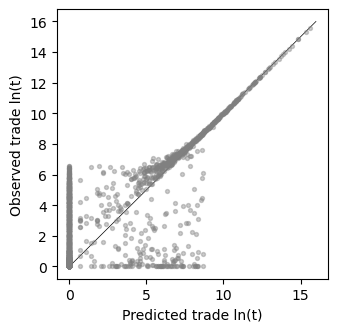

In [58]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil['trade_cal']), np.log(df_bil['q_calib']+1), s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

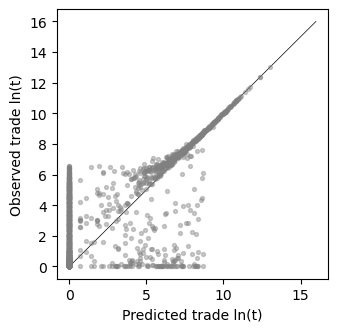

In [59]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal']), 
            np.log(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib']+1), 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade ln(t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade ln(t)')
plt.show()

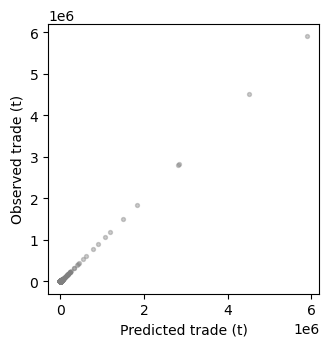

In [60]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil['trade_cal'], df_bil['q_calib'], s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

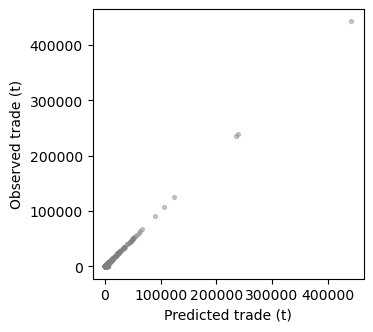

In [61]:
fig, ax = plt.subplots(figsize = (3.5,3.5))
plt.scatter(df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['trade_cal'], 
            df_bil[df_bil['from_abbreviation']!=df_bil['to_abbreviation']]['q_calib'], 
            s = 8, color = 'grey', alpha = 0.4, zorder = 3)
# plt.plot(np.linspace(0,16, 100), np.linspace(0,16, 100), color = 'k', lw = 0.5, zorder = 1)
# plt.xlim(0, 12); 
plt.xlabel('Predicted trade (t)')
# plt.ylim(0, 12); 
plt.ylabel('Observed trade (t)')
plt.show()

In [695]:
model_output = pd.read_csv('../../OPSIS/Data/Future_production_demand_data/IMPACT-output/IFPRI_model_output.csv')

In [696]:
model_output.head()

,Region,Commodity,SSP,Scenario,Impactparameter,Year,Val
0,EAP-Australia,AMT-Beef,SSP1,SSP1-RCP8.5-HGEM,QSupXAgg -- Commodity Supply,2050,3238.019688
1,EAP-Australia,AMT-Beef,SSP1,SSP1-NoCC,QSupXAgg -- Commodity Supply,2050,3301.767951
2,EAP-Australia,AMT-Beef,SSP1,SSP1-RCP8.5-HGEM,QSupXAgg -- Commodity Supply,2040,3061.296240
3,EAP-Australia,AMT-Beef,SSP1,SSP1-NoCC,QSupXAgg -- Commodity Supply,2040,3097.548293
4,EAP-Australia,AMT-Beef,SSP1,SSP1-RCP8.5-HGEM,QSupXAgg -- Commodity Supply,2030,2807.102095


In [697]:
### only for SSP2 multiple model runs, take output from 2010 out ###
SSP2 = model_output[(model_output['SSP']=='SSP2')&(model_output['Scenario']!='SSP2-RCP4.5-HGEM')&(model_output['Year']>2010)].reset_index(drop = True)

### process variables nicely ###
SSP2['Commodity_code'],SSP2['Commodity_name'] = SSP2['Commodity'].str.split('-', expand = True)[0],SSP2['Commodity'].str.split('-', expand = True)[1]
SSP2['Commodity_name'] = SSP2['Commodity_name'].str.replace(' ', '')
SSP2['Var_code'],SSP2['Var_name'] = SSP2['Impactparameter'].str.split(' -- ', expand = True)[0],SSP2['Impactparameter'].str.split(' -- ', expand = True)[1]

### remove unpacked columns
SSP2 = SSP2.drop(columns = ['Commodity','Impactparameter']).rename(columns = {'Commodity_name':'IMPACT_name'})

## set baseline ##
SSP2_2020 = SSP2[SSP2['Year']==2020][['Region','Commodity_code','IMPACT_name','Var_code','Var_name','Scenario','Val']].reset_index(drop = True).copy().rename(columns = {'Val':'Val_baseline'})
print(len(SSP2))
SSP2 = SSP2.merge(SSP2_2020, on = ['Region','Commodity_code','IMPACT_name','Var_code','Var_name','Scenario'], how = 'left')

### drop duplicates ##
#SSP2 = SSP2.drop_duplicates(subset = ['Scenario','Year','Region','IMPACT_name','Var_name'])
print(len(SSP2))


380064
380064


In [698]:
SSP2['Var_name'].unique()

array(['Commodity Supply', 'Total Demand', 'Animal Yield', 'Total Yield'],
      dtype=object)

In [699]:
SSP2['Var_code'].unique()

array(['QSupXAgg', 'QDXAgg', 'AnmlYldXAgg', 'TYldXAgg'], dtype=object)

In [700]:
SSP2['Year'].unique()

array([2050, 2040, 2030, 2020])

In [701]:
SSP2['IMPACT_name'].unique()

array(['Beef', 'Lamb', 'Pork', 'Poultry', 'Dairy', 'Eggs', 'Barley',
       'Maize', 'Millet', 'OtherCereals', 'Rice', 'Sorghum', 'Wheat',
       'Cacao', 'Coffee', 'Cotton', 'Other', 'Tea', 'Banana',
       'TemperateFruit', 'TropicalFruit', 'Vegetables', 'Groundnutmeal',
       'Othermeals', 'PalmKernelMeal', 'RapeseedMeal', 'SoybeanMeal',
       'SunflowerMeal', 'GroundnutOil', 'OtherOils', 'PalmFruitOil',
       'PalmKernelOil', 'RapeseedOil', 'SoybeanOil', 'SunflowerOil',
       'Groundnut', 'OtherOilseeds', 'Rapeseed', 'Soybean', 'Sunflower',
       'Beans', 'Chickpeas', 'Lentils', 'OtherPulses', 'Cassava',
       'OtherRoots', 'Potato', 'SweetPotato', 'Sugarcane', 'Sugar',
       'PalmFruit', 'PalmKernel'], dtype=object)

In [702]:
SSP2.head()

,Region,SSP,Scenario,Year,Val,Commodity_code,IMPACT_name,Var_code,Var_name,Val_baseline
0,EAP-Australia,SSP2,SSP2-RCP8.5-NORE,2050,3171.699220,AMT,Beef,QSupXAgg,Commodity Supply,2529.411069
1,EAP-Australia,SSP2,SSP2-RCP8.5-MIRO,2050,3143.161579,AMT,Beef,QSupXAgg,Commodity Supply,2525.500166
2,EAP-Australia,SSP2,SSP2-RCP8.5-IPSL,2050,3149.846790,AMT,Beef,QSupXAgg,Commodity Supply,2526.616833
3,EAP-Australia,SSP2,SSP2-RCP8.5-HGEM,2050,3124.257407,AMT,Beef,QSupXAgg,Commodity Supply,2523.564194
4,EAP-Australia,SSP2,SSP2-RCP8.5-GFDL,2050,3215.349318,AMT,Beef,QSupXAgg,Commodity Supply,2538.940192


In [703]:
SSP2 = SSP2[SSP2['Var_name']=='Total Yield']

In [704]:
SSP2.shape

(71232, 10)

In [705]:
SSP2.head()

,Region,SSP,Scenario,Year,Val,Commodity_code,IMPACT_name,Var_code,Var_name,Val_baseline
480,EAP-Australia,SSP2,SSP2-RCP8.5-NORE,2050,2.740254,CER,Barley,TYldXAgg,Total Yield,2.049672
481,EAP-Australia,SSP2,SSP2-RCP8.5-MIRO,2050,2.720572,CER,Barley,TYldXAgg,Total Yield,2.046791
482,EAP-Australia,SSP2,SSP2-RCP8.5-IPSL,2050,2.595181,CER,Barley,TYldXAgg,Total Yield,2.014886
483,EAP-Australia,SSP2,SSP2-RCP8.5-HGEM,2050,2.602117,CER,Barley,TYldXAgg,Total Yield,2.018240
484,EAP-Australia,SSP2,SSP2-RCP8.5-GFDL,2050,2.798624,CER,Barley,TYldXAgg,Total Yield,2.050278


In [706]:
SSP2['IMPACT_name'].nunique()

31

In [707]:
x = SSP2['IMPACT_name'].unique()
x.sort()
x

array(['Banana', 'Barley', 'Beans', 'Cacao', 'Cassava', 'Chickpeas',
       'Coffee', 'Cotton', 'Groundnut', 'Lentils', 'Maize', 'Millet',
       'Other', 'OtherCereals', 'OtherOilseeds', 'OtherPulses',
       'OtherRoots', 'PalmFruit', 'Potato', 'Rapeseed', 'Rice', 'Sorghum',
       'Soybean', 'Sugarcane', 'Sunflower', 'SweetPotato', 'Tea',
       'TemperateFruit', 'TropicalFruit', 'Vegetables', 'Wheat'],
      dtype=object)

In [708]:
SSP2['IMPACT_name'].value_counts()

IMPACT_name
Vegetables        3744
TemperateFruit    3576
Other             3528
Maize             3408
Potato            3336
OtherPulses       3312
TropicalFruit     3240
OtherOilseeds     3216
Wheat             2736
Beans             2712
Rice              2592
Groundnut         2568
Sorghum           2472
OtherCereals      2256
Banana            2232
Barley            2208
Soybean           2136
SweetPotato       2112
Sugarcane         2088
Cotton            2040
Millet            1968
Cassava           1800
OtherRoots        1776
Sunflower         1632
Coffee            1632
Rapeseed          1440
Lentils           1248
Chickpeas         1224
Cacao             1224
Tea               1056
PalmFruit          720
Name: count, dtype: int64

In [709]:
SSP2['Region'].nunique()

157

In [710]:
SSP2['Region'].value_counts()

Region
EAP-China                720
LAC-Mexico               720
SSA-Tanzania             696
SAS-India                672
SSA-Kenya                672
                        ... 
SSA-Equatorial Guinea    192
EAP-Mongolia             192
EUR-Norway               168
SSA-Djibouti              96
EUR-Iceland               48
Name: count, Length: 157, dtype: int64

In [711]:
SSP2['Scenario'].nunique()

6

In [712]:
SSP2['Scenario'].value_counts()

Scenario
SSP2-RCP8.5-NORE    11872
SSP2-RCP8.5-MIRO    11872
SSP2-RCP8.5-IPSL    11872
SSP2-RCP8.5-HGEM    11872
SSP2-RCP8.5-GFDL    11872
SSP2-NoCC           11872
Name: count, dtype: int64

In [713]:
SSP2['Year'].nunique()

4

In [714]:
SSP2['Year'].value_counts()

Year
2050    17808
2040    17808
2030    17808
2020    17808
Name: count, dtype: int64

In [715]:
31*157*6*4

116808

'jwhea', 'jrice', 'jmaiz', 
'jbarl', 'jmill', 'jsorg', 
'jocer', 'jcass', 'jpota', 
'jyams', 'jswpt', 'jorat', 
'jvege', 'jbana', 'jplnt', 
'jsubf', 'jtemf', 'jbean', 
'jchkp', 'jcowp', 'jlent', 
'jpigp', 'jopul', 'jsoyb',
'jgrnd', 'jothr', 'jrpsd', 
'jsnfl', 'jtols', 'jpalm', 
'jsugb', 'jsugc'


problem crops (start with the scenarios for the others for now):
millet: 0.08 r2 for prices, prices are also scaled down to as much as 20%, which doesn't happen often for other crops) 
bean, chkp, cowp, lent, pigp, opul: negative or almost 0 r2, prices are scaled down quite often and to as much as 20%
grnd: calibration was extremely difficult!!!! uzbekistan has 4e8 price??? check fao data
rpsd, snfl: negative r2, scatterplot looks weird, prices are scaled down to as much as 20%
tols: uzbekistan has a price of 4e8 (probably because og groundnut again)

when is calib a problem? its usually close to 0, but all crops have right skews

In [716]:
crop_code = 'jorat'
country_file = pd.read_csv(f'{data_dir}/Input/Country_data/country_information_'+str(crop_code)+'.csv')
bil_file = pd.read_csv(f'{data_dir}/Input/Trade_cost/bilateral_trade_cost_'+str(crop_code)+'.csv')

cal_tc = pd.read_csv(f'{calibration_output}/tc_calibration_{crop_code}.csv', header=None, names=['from_abbreviation', 'to_abbreviation', 'tc_cal'])
cal_price = pd.read_csv(f'{calibration_output}/prodprice_calibration_{crop_code}.csv', header=None, names=['abbreviation', 'price_cal'])
calib = pd.read_csv(f'{calibration_output}/calib_calibration_{crop_code}.csv', header=None, names=['from_abbreviation', 'to_abbreviation', 'calib'])

price_compare = country_file.merge(cal_price)
tc_compare = bil_file.merge(cal_tc)

     from_abbreviation to_abbreviation     calib
2210               G43             G27  0.096332
2228               G43             G45  0.098549
1028               G20             G41  0.170564
2201               G43             G18  0.204519
1837               G36             G18  0.214451
1843               G36             G24  0.236137
2218               G43             G35  0.478294
2200               G43             G17  0.636850
1572               G31             G13  1.167244
1611               G31             G52  1.487730


<Axes: >

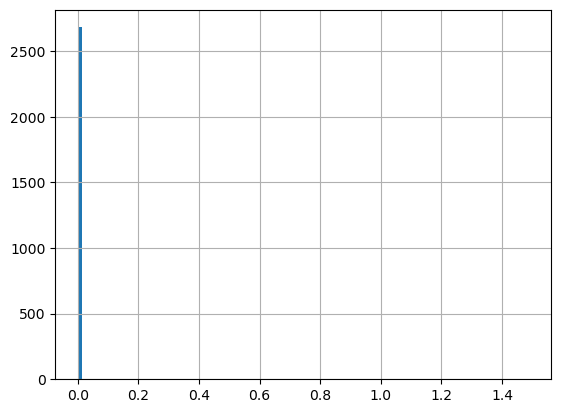

In [717]:
#calib
print(calib.sort_values(by='calib').tail(10))
calib['calib'].hist(bins=100)

In [718]:
#tc
print(np.sqrt(mean_squared_error(tc_compare['trade_USD_t'], tc_compare['tc_cal'])))
print(r2_score(tc_compare['trade_USD_t'], tc_compare['tc_cal']))
print((tc_compare['tc_cal'] / tc_compare['trade_USD_t']).describe())
sns.scatterplot(x=tc_compare['trade_USD_t'], y=tc_compare['tc_cal'])

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

823.6513087467628
0.5473183041975516
count    120.000000
mean       0.807024
std        0.458573
min        0.200000
25%        0.506385
50%        0.819702
75%        0.899273
max        3.000000
dtype: float64


<Axes: xlabel='prod_price_USD_t', ylabel='price_cal'>

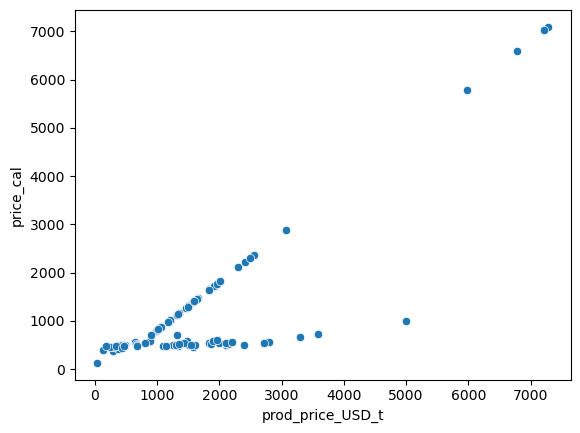

In [ ]:
#prod price
print(np.sqrt(mean_squared_error(price_compare['prod_price_USD_t'], price_compare['price_cal'])))
print(r2_score(price_compare['prod_price_USD_t'], price_compare['price_cal']))
print((price_compare['price_cal'] / price_compare['prod_price_USD_t']).describe())
sns.scatterplot(x=price_compare['prod_price_USD_t'], y=price_compare['price_cal'])

In [ ]:
price_compare[(price_compare['price_cal']<200) & (price_compare['prod_price_USD_t']>500)]

,abbreviation,IMPACT_code,yield_t_ha,prod_price_USD_t,import_q,export_q,demand_q,supply_q,domestic_q,demand_elas,supply_elas,price_cal
19,CAF,jrpsd,1.694848,598.617581,21.589532,0.0,21.589532,0.0,0.0,-0.563942,1.1718,192.377370
26,COD,jrpsd,1.694848,598.617581,1.258140,0.0,1.258140,0.0,0.0,-0.553317,1.1718,178.906447
123,TCD,jrpsd,1.694848,598.617581,3.058641,0.0,3.058641,0.0,0.0,-0.555412,0.8316,182.633749


In [ ]:
price_compare[(price_compare['prod_price_USD_t']>1e8)]

,abbreviation,IMPACT_code,yield_t_ha,prod_price_USD_t,import_q,export_q,demand_q,supply_q,domestic_q,demand_elas,supply_elas,price_cal
144,UZB,jtols,1.763412,4.205225e+08,23601.112415,43057.980476,7119.384347,26576.252407,-16481.728068,-0.30331,0.7938,2.412115e+08


In [ ]:
price_compare[price_compare['abbreviation']=='KOR']

,abbreviation,IMPACT_code,yield_t_ha,prod_price_USD_t,import_q,export_q,demand_q,supply_q,domestic_q,demand_elas,supply_elas,price_cal
75,KOR,jtemf,13.928295,1854.540096,113296.53841,39809.99929,1.643176e+06,1569689.0,1.529879e+06,-0.355639,0.352,1103.329394
